In [1]:
import pandas as pd
import glob

In [2]:
comm_paths = glob.glob("data/Commentaries/*.csv")
len(comm_paths)

501

In [3]:
report_paths = glob.glob("data/Reports/*.txt")
len(report_paths)

592

In [4]:
comm_fno = []
for i in comm_paths:
    fno = int(i.split("\\")[-1].split("_")[-1].split(".")[0])
    comm_fno.append(fno)

report_fno = []
for j in report_paths:
    fno = int(j.split("\\")[-1].replace("report", "").split(".")[0])
    report_fno.append(fno)

comm_fno = set(comm_fno)
report_fno = set(report_fno)

In [5]:
to_read_fno = list(comm_fno.intersection(report_fno))

In [6]:
comm_read_paths = []
for i in comm_paths:
    fno = int(i.split("\\")[-1].split("_")[-1].split(".")[0])
    if fno in to_read_fno:
        comm_read_paths.append(i)

report_read_paths = []
for j in report_paths:
    fno = int(j.split("\\")[-1].replace("report", "").split(".")[0])
    if fno in to_read_fno:
        report_read_paths.append(j)

In [7]:
len(comm_read_paths) == len(report_read_paths)

True

In [8]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-large")

In [81]:
def commentary_read(path):
    test_str_lst = pd.read_csv(path)["Data"].to_list()
    comm_inp_lst = []
    cnt = 0
    for i in test_str_lst:
        j = i.lower()
        if "run" not in j:
            if cnt==0 or cnt>=len(test_str_lst)-3:
                comm_inp_lst.append(i)
            elif " bye " not in j and " wide " not in j and "extra" not in j:
                if " out " in j:
                    comm_inp_lst.append(i)
                elif "wicket" in j:
                    comm_inp_lst.append(i)
            else:
                if random.choice([0,1]) == 1:
                    comm_inp_lst.append(i)
        elif " six " in j:
            if random.choice([0,1,0,0]) == 1:
                comm_inp_lst.append(i)
        cnt = cnt + 1
    return ' '.join(comm_inp_lst)

In [82]:
def report_read(path):
    with open(path) as f:
        report_str = f.read()
    return report_str

In [83]:
final_commentaries = []
final_reports = []
for i in comm_read_paths:
    final_commentaries.append(commentary_read(i))
for j in report_read_paths:
    final_reports.append(report_read(j))

In [84]:
final_df = pd.DataFrame({
    "Commentary_Highlights" : final_commentaries,
    "Match_Report" : final_reports
})
final_df

,Commentary_Highlights,Match_Report
0,5.30pm Bangladesh have won the toss and will b...,"Bangladesh 122 for 8 (Naim 23, Ellis 2-16, Chr..."
1,7.00pm Australia have won the toss and will ba...,"Australia 189 for 6 (Marsh 75, Finch 53, Walsh..."
2,"Rashid to Finch, 2 wide angled down the leg si...","England 5 for 308 (Roy 180, Root 91*) beat Aus..."
3,"Stanlake to Guptill, 2 wide short outside off,...",Australia 121 for 3 (Short 50) beat New Zealan...
4,6.30pm New Zealand won the toss and will bat. ...,"Australia 245 for 5 (Short 76, Warner 59) beat..."
...,...,...
460,"Starc to Dickwella, OUT gone first ball! Gets ...",Australia 3 for 145 (Warner 57*) beat Sri Lank...
461,"Tye to Roy, OUT battered high in the air, and ...","England 259 (Root 62, Tye 5-46) beat Australia..."
462,1.20pm: We've have a toss! And Australia have ...,"Australia 197 for 7 (Head 96, Rashid 3-49) bea..."
463,"Zampa to Bairstow, OUT oh beautifully bowled. ...","England 6 for 302 (Buttler 100*, Woakes 53*) b..."


In [85]:
final_df.to_parquet("data/match_report_gen.parquet", index=False)
final_df.to_csv("data/match_report_gen.csv", index=False)

In [86]:
final_df

,Commentary_Highlights,Match_Report
0,5.30pm Bangladesh have won the toss and will b...,"Bangladesh 122 for 8 (Naim 23, Ellis 2-16, Chr..."
1,7.00pm Australia have won the toss and will ba...,"Australia 189 for 6 (Marsh 75, Finch 53, Walsh..."
2,"Rashid to Finch, 2 wide angled down the leg si...","England 5 for 308 (Roy 180, Root 91*) beat Aus..."
3,"Stanlake to Guptill, 2 wide short outside off,...",Australia 121 for 3 (Short 50) beat New Zealan...
4,6.30pm New Zealand won the toss and will bat. ...,"Australia 245 for 5 (Short 76, Warner 59) beat..."
...,...,...
460,"Starc to Dickwella, OUT gone first ball! Gets ...",Australia 3 for 145 (Warner 57*) beat Sri Lank...
461,"Tye to Roy, OUT battered high in the air, and ...","England 259 (Root 62, Tye 5-46) beat Australia..."
462,1.20pm: We've have a toss! And Australia have ...,"Australia 197 for 7 (Head 96, Rashid 3-49) bea..."
463,"Zampa to Bairstow, OUT oh beautifully bowled. ...","England 6 for 302 (Buttler 100*, Woakes 53*) b..."


In [87]:
final_df["src_len"] = final_df["Commentary_Highlights"].map(lambda x : len(tokenizer(x)["input_ids"]))
final_df["tgt_len"] = final_df["Match_Report"].map(lambda x : len(tokenizer(x)["input_ids"]))

In [88]:
final_df

,Commentary_Highlights,Match_Report,src_len,tgt_len
0,5.30pm Bangladesh have won the toss and will b...,"Bangladesh 122 for 8 (Naim 23, Ellis 2-16, Chr...",958,186
1,7.00pm Australia have won the toss and will ba...,"Australia 189 for 6 (Marsh 75, Finch 53, Walsh...",939,328
2,"Rashid to Finch, 2 wide angled down the leg si...","England 5 for 308 (Roy 180, Root 91*) beat Aus...",1007,301
3,"Stanlake to Guptill, 2 wide short outside off,...",Australia 121 for 3 (Short 50) beat New Zealan...,936,229
4,6.30pm New Zealand won the toss and will bat. ...,"Australia 245 for 5 (Short 76, Warner 59) beat...",929,310
...,...,...,...,...
460,"Starc to Dickwella, OUT gone first ball! Gets ...",Australia 3 for 145 (Warner 57*) beat Sri Lank...,957,178
461,"Tye to Roy, OUT battered high in the air, and ...","England 259 (Root 62, Tye 5-46) beat Australia...",1031,273
462,1.20pm: We've have a toss! And Australia have ...,"Australia 197 for 7 (Head 96, Rashid 3-49) bea...",813,332
463,"Zampa to Bairstow, OUT oh beautifully bowled. ...","England 6 for 302 (Buttler 100*, Woakes 53*) b...",1172,214


In [89]:
final_df["Commentary_Highlights"][0]

"5.30pm Bangladesh have won the toss and will bat Agar to Mohammad Naim, 1 wide another one turns far down leg side from a good length on middle, and it is a wide Turner to Mahedi Hasan, 1 wide turns down leg, and a wide. Full length on middle and leg, and he is beaten on his sweep as the ball turns down Turner to Mahedi Hasan, 1 wide and another wide, this time outside off Turner to Mahedi Hasan, 3 wide Wade misses this ball, as it turns down leg after pitching full on middle and leg. The batter misses is sweep too, and that is wide again Turner to Mahedi Hasan, OUT top edge gobbled at midwicket! Shorter in length on middle, and the ball seemed like stopping on to the pitch as he went for the pull off his back foot. The bat entirely came out of his hands as he played that. Anyway, that is a wicket Turner will gladly accept after a couple of wides in the over Christian to Shakib, 1 leg bye goes for the lap, but is beaten. Full ball on off from wide of the crease again. The ball trickle

C:\Users\vasan\AppData\Local\Temp\ipykernel_8752\1184740705.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df["src_len"])


<Axes: xlabel='src_len', ylabel='Density'>

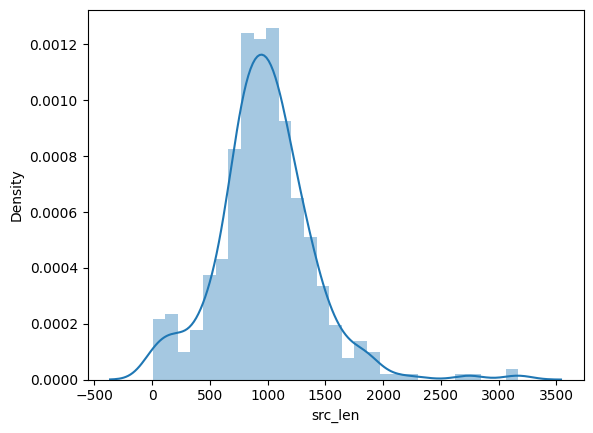

In [90]:
import seaborn as sns
sns.distplot(final_df["src_len"])

In [91]:
final_df.describe()

,src_len,tgt_len
count,465.000000,465.000000
mean,982.662366,267.569892
std,419.587487,56.510870
min,5.000000,97.000000
25%,762.000000,231.000000
50%,971.000000,271.000000
75%,1190.000000,307.000000
max,3172.000000,439.000000


In [76]:
import pandas as pd
df = pd.read_excel("data_new_T5.xlsx")

In [77]:
df.iloc[0]

input_text     5.30pm Bangladesh have won the toss and will b...
target_text    Bangladesh 122 for 8 (Naim 23, Ellis 2-16, Chr...
Name: 0, dtype: object

In [79]:
df["src_len"] = df["input_text"].map(lambda x : len(tokenizer(x)["input_ids"]))
df["tgt_len"] = df["target_text"].map(lambda x : len(tokenizer(x)["input_ids"]))

In [80]:
df.describe()

,src_len,tgt_len
count,463.000000,463.000000
mean,492.846652,268.164147
std,40.271807,55.859702
min,68.000000,100.000000
25%,491.000000,232.500000
50%,500.000000,272.000000
75%,508.000000,307.000000
max,513.000000,439.000000
